gals:  [(  11891,  160003467489, 2,     111, 0,  136, 74498, [132.21861 ,  95.35761 , 104.57693 ], [  67.29805 ,  441.3286  ,  938.79443 ], 0.0454316 ,  2.5750823, 0.05165394,  46.303493,  67.394455, 4.1515484e+04, 0.0000000e+00, 0., 0.0054558 , 4.1853520e-05, 0.6598544, 0.00094406, 0.00365363, 0., 0.00165938, 8.4385195, 10.243702 , 0., 0.0033042 , 0., 0., 8.4048003e-02, 0., 0.3337882 , 1.8081535e+04, 0.17498946, 1.0000000e+00, 1., 0., 5.4107985, 0.01215152, [5.4992110e-05, 6.5075001e-05, 2.2388813e-05, 2.4459574e-05, 2.6845300e-05], 0.0244949, 0.57328147, 1.,     0.   , 3.9496636, 0., 0.000000e+00, 166.43083)
 (  15039,  160002967963, 2,    1459, 0,  125, 49597, [135.23091 ,  80.398964, 126.85246 ], [  74.069534,  543.02875 , -122.46913 ], 0.0229848 ,  2.3668036, 0.04888174,  45.632866,  76.945984, 2.3939027e+04, 0.0000000e+00, 0., 0.00141447, 1.7390466e-05, 0.8223824, 0.00042878, 0.00085095, 0., 0.00079446, 4.1860113,  5.074237 , 0., 0.00150073, 0., 0., 4.3494087e-02, 0., 0.9955656 ,

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10



new mf array item:  [[7.53999996e+00 1.04612356e-01]
 [7.61999989e+00 1.06089727e-01]
 [7.69999981e+00 1.08596648e-01]
 [7.77999973e+00 1.11075031e-01]
 [7.86000013e+00 1.15011028e-01]
 [7.94000006e+00 1.17456483e-01]
 [8.02000046e+00 1.19776812e-01]
 [8.10000038e+00 1.19539730e-01]
 [8.18000031e+00 1.15766178e-01]
 [8.26000023e+00 1.06498034e-01]
 [8.34000015e+00 9.37636670e-02]
 [8.42000008e+00 8.17449356e-02]
 [8.50000000e+00 7.09906405e-02]
 [8.57999992e+00 5.87787313e-02]
 [8.65999985e+00 4.89771539e-02]
 [8.73999977e+00 4.05146498e-02]
 [8.81999969e+00 3.50398158e-02]
 [8.89999962e+00 3.04891619e-02]
 [8.97999954e+00 2.76880840e-02]
 [9.06000042e+00 2.42284455e-02]
 [9.14000034e+00 2.21495891e-02]
 [9.22000027e+00 1.96075451e-02]
 [9.30000019e+00 1.75989352e-02]
 [9.38000011e+00 1.60008281e-02]
 [9.46000004e+00 1.45366283e-02]
 [9.53999996e+00 1.33490239e-02]
 [9.61999989e+00 1.16762799e-02]
 [9.69999981e+00 1.08135655e-02]
 [9.77999973e+00 9.62596118e-03]
 [9.85999966e+00 9.127

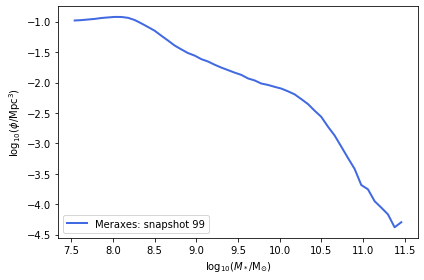

In [1]:
#!/usr/bin/env python
"""A simple example of plotting the stellar mass function (SMF) from Meraxes
output using single snapshot=100"""

# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library

# DRAGONS modules for reading and dealing with model ouput
from dragons import meraxes, munge

# First set the requested Hubble parameter value.
# By specifying h=0.7, we are ensuring that all of the galaxy properties
# are converted to a Hubble constant of H0=70 km/s/Mpc when they are read in.
#
# Note that if you want to set the hubble value to the actual value
# corresponding to the cosmology of the input N-body simulation then just pass `fname_in` to `set_little_h`
fname_in = "imapping_testrun/meraxes.hdf5"
meraxes.set_little_h(0.7)

# First read in all of the galaxies at snapshot 100 (z=5).  Note that you will
# of course need to update the paths to any files appropriately.
#
# By specifying `sim_props=True` when reading the galaxies, we are also
# returned a dictionary of properties for the Meraxes run we are reading.
gals, sim_props = meraxes.read_gals(fname_in, snapshot=250, sim_props=True)
print('gals: ', gals)
print('sim_props: ', sim_props)
# You can also see the units of all galaxy properties (and grids properties if
# they are present).  Here I am only printing the galaxy properties.
units = meraxes.read_units(fname_in)
print('\nunits\n=====')
for k, v in units.items():
    if not isinstance(v, dict):
        print(k, ':', v.decode('utf-8'))
print()

# The units of stellar masses ouput by the model are 1e10 Msol.  Let's convert
# this to log10(M/Msol).
gals["StellarMass"] = np.log10(gals["StellarMass"]*1e10)
print('\ngals: ', gals["StellarMass"])

# The `munge` module has a nice function that will calculate the mass function
# for us.  Take a look at the source code for this function if you are
# interested to see how it does this (recommended).
# mf = "mass function"
mf = munge.mass_function(gals["StellarMass"], sim_props["Volume"], bins=50,
                         range=(7.5, 11.5))
print('\nnew mf array item: ', mf)

print("\nCentralGal type: ", type(gals["CentralGal"])) 

# Now let's plot the mass function...

# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
# plt.title("Stellar Mass Function for snap = 100")

# Plot the mass function
ax.plot(mf[:, 0], np.log10(mf[:, 1]), color="RoyalBlue", lw=2,
        label="Meraxes: snapshot 99")

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_* / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()
plt.savefig("plots/smf.pdf")